In [1]:
# beware mujoco 2.3.3 has a bug, time is not incremented in step function
!pip install mujoco==2.3.2
import mujoco
import arcpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#@title Other imports and helper functions
import numpy as np
from typing import Callable, Optional, Union, List
import scipy.linalg

# Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

Installing mediapy:


In [3]:
xml_filepath = "./iiwa_robotiq_85.xml"
with open(xml_filepath, 'r') as f:
  xml = f.read()

In [4]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

""

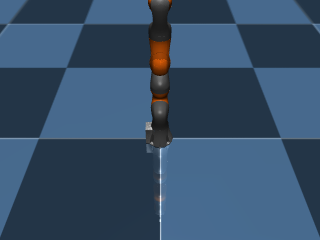

In [5]:
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

key: 0


""

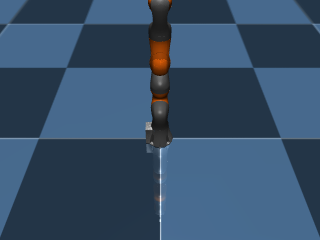

In [6]:
for key in range(model.nkey):
    print("key: " + str(key))
    mujoco.mj_resetDataKeyframe(model, data, key)
    mujoco.mj_forward(model, data)
    renderer.update_scene(data)
    media.show_image(renderer.render())

In [8]:
DURATION  = 3   # seconds
FRAMERATE = 60  # Hz

# Initialize to the standing-on-one-leg pose.
mujoco.mj_resetDataKeyframe(model, data, 0)

frames = []
while data.time < DURATION:
    # Step the simulation.
    #data.
    
    mujoco.mj_step(model, data)
    

    # Render and save frames.
    if len(frames) < data.time * FRAMERATE:
        # print("save time: " + str(data.time))
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels.copy())
print("len frames " + str(len(frames)))
# Display video.b
media.show_video(frames, fps=FRAMERATE)
# media.show_image(frames[1])

len frames 181


In [ ]:
print(model.opt.timestep)

In [ ]:
help(data)

In [ ]:
viewer = mujoco.viewer.launch(model)

In [11]:
from mujoco import viewer
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
viewer.launch(model, data)

In [ ]:
help(viewer)

In [9]:
!source /home/geraldebmer/catkin_ws/devel/setup.bash
import arcpy_cpp
#help(arcpy_cpp.Iiwa.RobotModel)

In [10]:
f_c = np.ones((7,1))
Ts = 0.001
iiwa_model = arcpy_cpp.Iiwa.RobotModel(f_c, Ts)
print(iiwa_model)
ct_param = arcpy_cpp.Iiwa.JointCTParameter()
print(ct_param)

RobotModel(q=(0
0
0
0
0
0
0])
JointCTParameter:
K0:
1 0 0 0 0 0 0
0 1 0 0 0 0 0
0 0 1 0 0 0 0
0 0 0 1 0 0 0
0 0 0 0 1 0 0
0 0 0 0 0 1 0
0 0 0 0 0 0 1
K1:
1 0 0 0 0 0 0
0 1 0 0 0 0 0
0 0 1 0 0 0 0
0 0 0 1 0 0 0
0 0 0 0 1 0 0
0 0 0 0 0 1 0
0 0 0 0 0 0 1
KI:
0 0 0 0 0 0 0
0 0 0 0 0 0 0
0 0 0 0 0 0 0
0 0 0 0 0 0 0
0 0 0 0 0 0 0
0 0 0 0 0 0 0
0 0 0 0 0 0 0
